In [11]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo 

[Adult Census dataset](https://archive.ics.uci.edu/dataset/2/adult) is to predict whether income exceeds $50K/yr based on census data.

In [12]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 

raw_df=pandas.DataFrame(adult.data.original)

display(adult.variables)

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


Other than sex, the dataset also has following protected attributes:
- Age (age)
- Race (race)

In [13]:
print(f"The dataset contains {raw_df.shape[0]} entries")
print(f"Number of duplicate entries: {raw_df.duplicated().sum()}")

df=raw_df.drop_duplicates()

print(f"The dataset contains {df.shape[0]} unique entries")
print(f"This datasets has {df.shape[1]-1} features")

The dataset contains 48842 entries
Number of duplicate entries: 29
The dataset contains 48813 unique entries
This datasets has 14 features


In [14]:
label_column="income"

In [15]:
df[label_column]=df[label_column].replace(['<=50K.','>50K.'],['<=50K','>50K'])
#cleaning faulty label in the dataset
df=df.replace(['?'],[np.nan])
#Unifiying missing values

C:\Users\15783\AppData\Local\Temp\ipykernel_2996\938328759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label_column]=df[label_column].replace(['<=50K.','>50K.'],['<=50K','>50K'])


Unifying values with the same meaning in the dataset

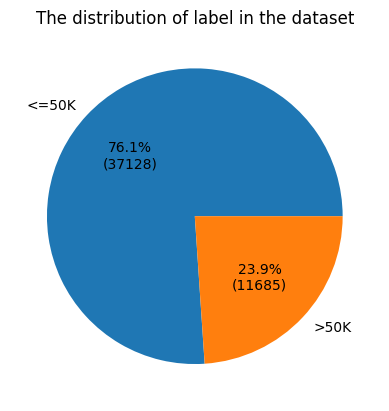

In [16]:
label_count = df[label_column].value_counts()

def autolabel(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(label_count,labels=label_count.index, autopct=lambda pct: autolabel(pct, label_count))
plt.title("The distribution of label in the dataset")
plt.show()

The label is imbalanced, with negative dominating the dataset.

In [17]:
sex_column="sex"
privilleged_group="Male"

The analysis of protected variable sex

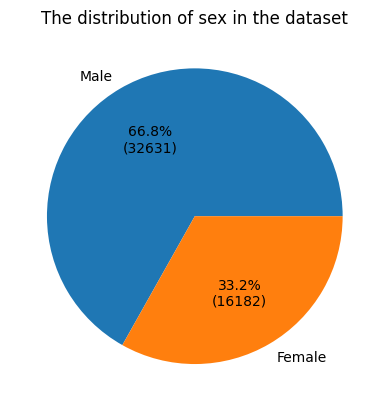

In [18]:
sex_count = df[sex_column].value_counts()

plt.pie(sex_count,labels=sex_count.index, autopct=lambda pct: autolabel(pct, sex_count))
plt.title("The distribution of sex in the dataset")
plt.show()

The distribution of protected attribute of dataset skews towards privilleged groups

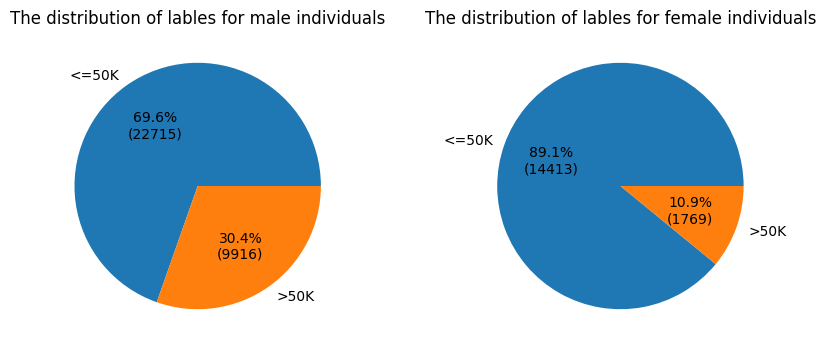

In [19]:
man_df=df.loc[raw_df[sex_column]==privilleged_group].loc[:,[sex_column,label_column]]
woman_df=df.loc[raw_df[sex_column]!=privilleged_group].loc[:,[sex_column,label_column]]

male_label_count=man_df[label_column].value_counts()
female_label_count=woman_df[label_column].value_counts()

fig, ax=plt.subplots(1,2,figsize=(10, 4))
ax[0].pie(male_label_count,labels=male_label_count.index, autopct=lambda pct: autolabel(pct, male_label_count))
ax[0].set_title("The distribution of lables for male individuals")
ax[1].pie(female_label_count,labels=female_label_count.index, autopct=lambda pct: autolabel(pct, female_label_count))
ax[1].set_title("The distribution of lables for female individuals")
plt.show()

Regarding this protected varaible, the dataset is dominated by Male.

In addition, the postivie lables correlate with Male individuals, while the negative labels correlate with Female individuals.